<p style="font-size:78px">Final Project IRWA (2024-2025)</p>

<p style="font-size:48px">Part 1: Text Processing and Exploratory Data Analysis</p>

# 1) Pre-processing the documents

In [1]:
# Standard library imports
import math
import os
import sys
import time

# Third-party imports
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
try:
    nltk.data.find('corpora/stopwords.zip')
except LookupError:
    nltk.download('stopwords')

# Local application
current_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in locals() else os.getcwd()
project_root = os.path.join(current_dir, '..')
if project_root not in sys.path:
    sys.path.append(project_root)
import irwa.loading as ild 

# The following lines allow for autoreload of modules. They allow to use changes in modules without the need to reload the kernel.
%load_ext autoreload
%autoreload 2 

In [2]:
# Loading the tweets
file_path = '../data/farmers-protest-tweets.json'
tweets = ild.load_all_tweets(file_path)
print(f"Loaded {len(tweets)} tweets")

Loaded 117407 tweets


In [3]:
# Preprocessing the tweets
tweet_document_ids_map_df = "../data/tweet_document_ids_map.csv"
token_tweets = ild.create_tokenized_dictionary(tweets, tweet_document_ids_map_df)

In [4]:
# Look at first 5 documents to make sure preprocessing worked
for doc_id, tokens in list(token_tweets.items())[:5]:
    print(f"Document ID: {doc_id}, Tokens: {tokens}")

Document ID: doc_0, Tokens: ['world', 'progress', 'indian', 'polic', 'govt', 'still', 'tri', 'take', 'india', 'back', 'horrif', 'past', 'tyranni', 'narendramodi', 'delhipolic', 'shame', '#modidontsellfarm', '#farmersprotest', '#freenodeepkaur', 'https://t.co/es3kn0iqaf']
Document ID: doc_1, Tokens: ['#farmersprotest', '#modiignoringfarmersdeath', '#modidontsellfarm', 'kisanektamorcha', 'farmer', 'constantli', 'distroy', 'crop', 'throughout', 'india', 'realli', 'heart', 'breakingw', 'care', 'crop', 'like', 'children', 'govt', 'agricultur', 'minist', 'laugh', 'us🚜🌾w', 'win💪', 'https://t.co/klspngg9xe']
Document ID: doc_2, Tokens: ['reallyswara', 'rohinisgh', 'watch', 'full', 'video', '#farmersprotest', '#nofarmersnofood', 'https://t.co/wbpndjdb0n', 'https://t.co/fustokocxk']
Document ID: doc_3, Tokens: ['mandeeppunia1', 'watch', 'full', 'video', '#farmersprotest', '#nofarmersnofood', 'https://t.co/wbpndjdb0n', 'https://t.co/71imqec6ak']
Document ID: doc_4, Tokens: ['mandeeppunia1', 'watc

# 2) Exploratory Data Analysis

In [4]:
import pandas as pd
import re
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
from statistics import mean
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

## Word Count

In [5]:
def word_count(tweets, top_words, count_type='all'):

    # Step 1: Flatten the list of lists into a single list of words
    all_words = list(chain.from_iterable(tweets.values()))

    # Step 2: Filter words based on count_type
    if count_type == "hashtags":
        words_to_count = [word for word in all_words if word.startswith('#')]  # Only hashtags
    elif count_type == "no_hashtags":
        words_to_count = [word for word in all_words if not word.startswith('#')]  # Exclude hashtags
    else:
        words_to_count = all_words  # Include all words

    # Step 3: Count the frequency of each word
    word_counts= Counter(words_to_count)

    # Step 4: Get the 10 most common words
    most_common_words = word_counts.most_common(top_words)

    return word_counts, most_common_words



def plot_word_counts(most_common_words):
    
    most_common_words.sort(key=lambda x: x[1], reverse=True)
    words, counts = zip(*most_common_words)  # Unzip the list of tuples

    # Normalize counts for color gradient
    norm_counts = np.array(counts) / max(counts)

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 6 + len(most_common_words) * 0.25))  # Adjust height based on number of words
    bars = plt.barh(words, counts, color=plt.cm.Blues(norm_counts))

    # Add labels to bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), 
                 ha='left', va='center', fontsize=10)

    plt.title('Most Common Words in Tweets')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()



### Inlcuding all words

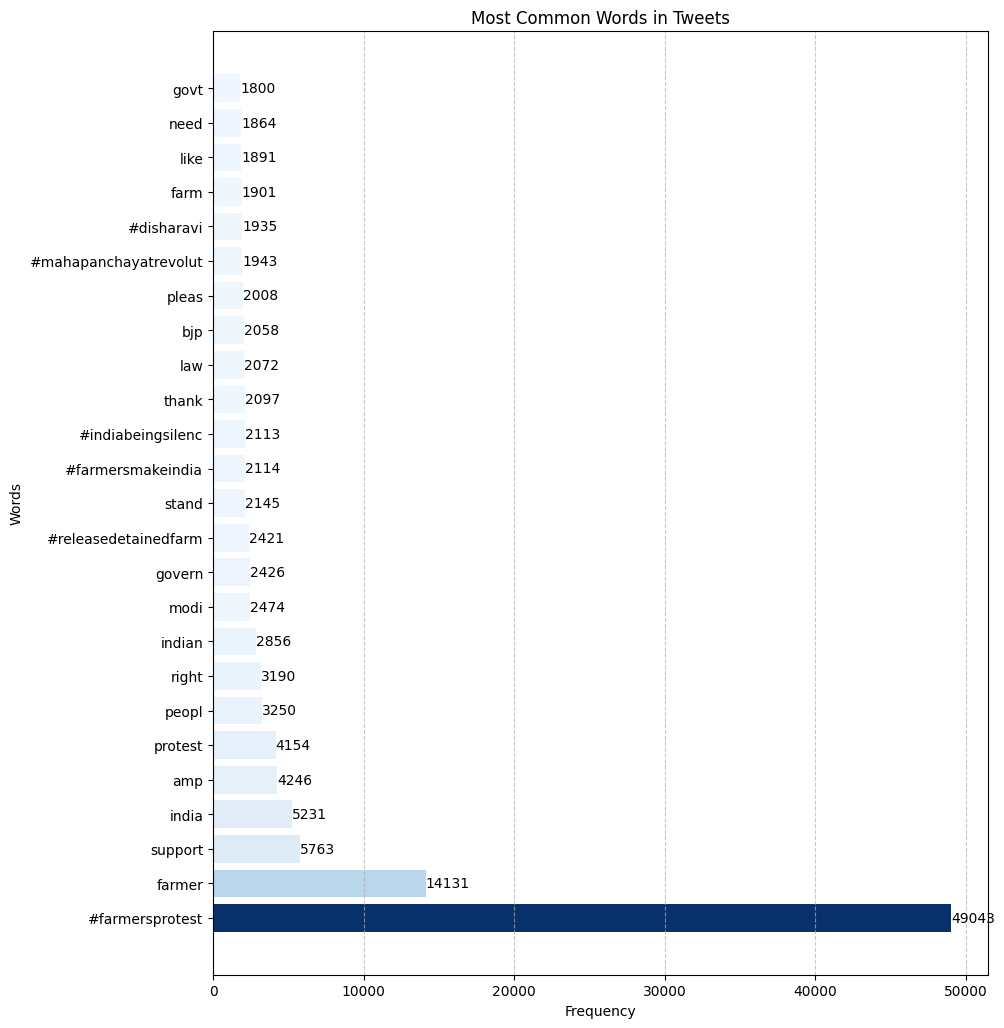

In [6]:
word_counts_all, most_common_words_all = word_count(token_tweets, 25, 'all')
plot_word_counts(most_common_words_all)

### Only Hashtags

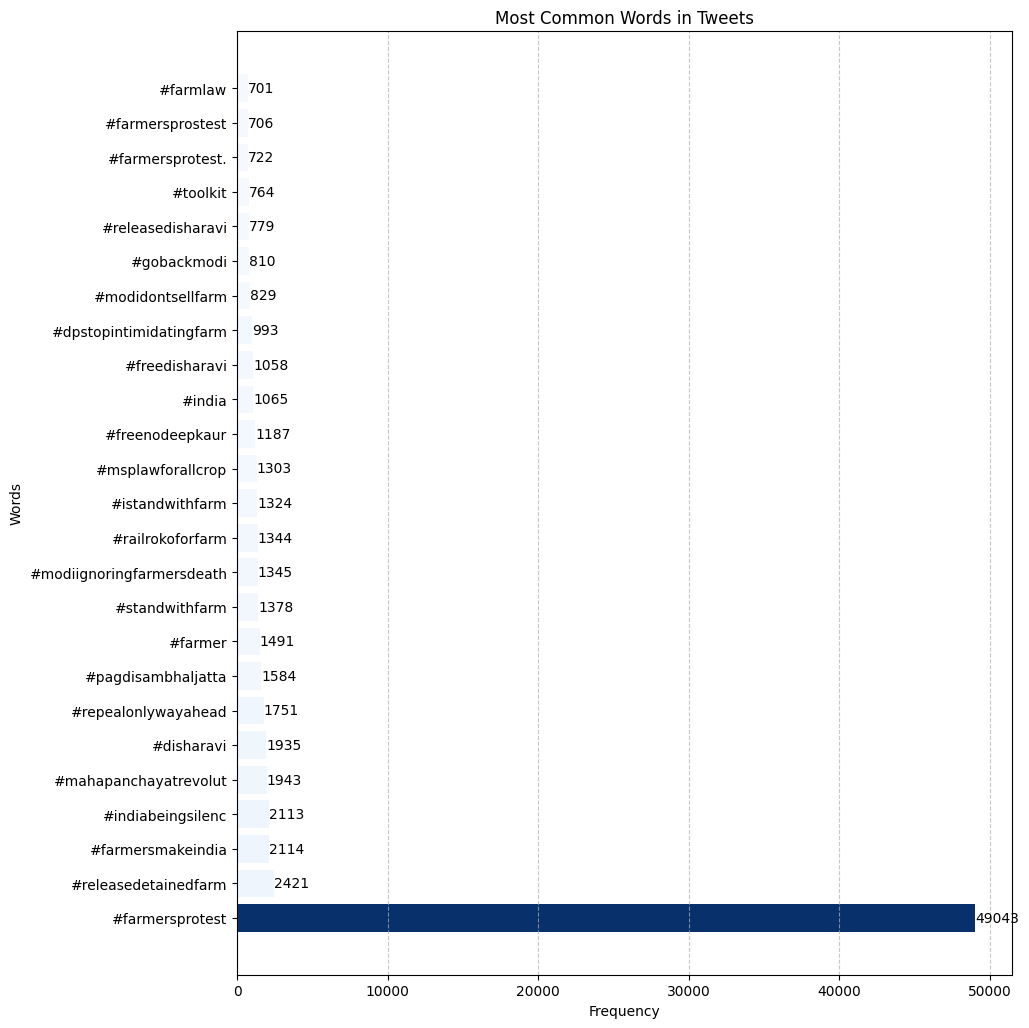

In [7]:
word_counts_ht, most_common_words_ht = word_count(token_tweets, 25, 'hashtags')
plot_word_counts(most_common_words_ht)

### No Hashtags

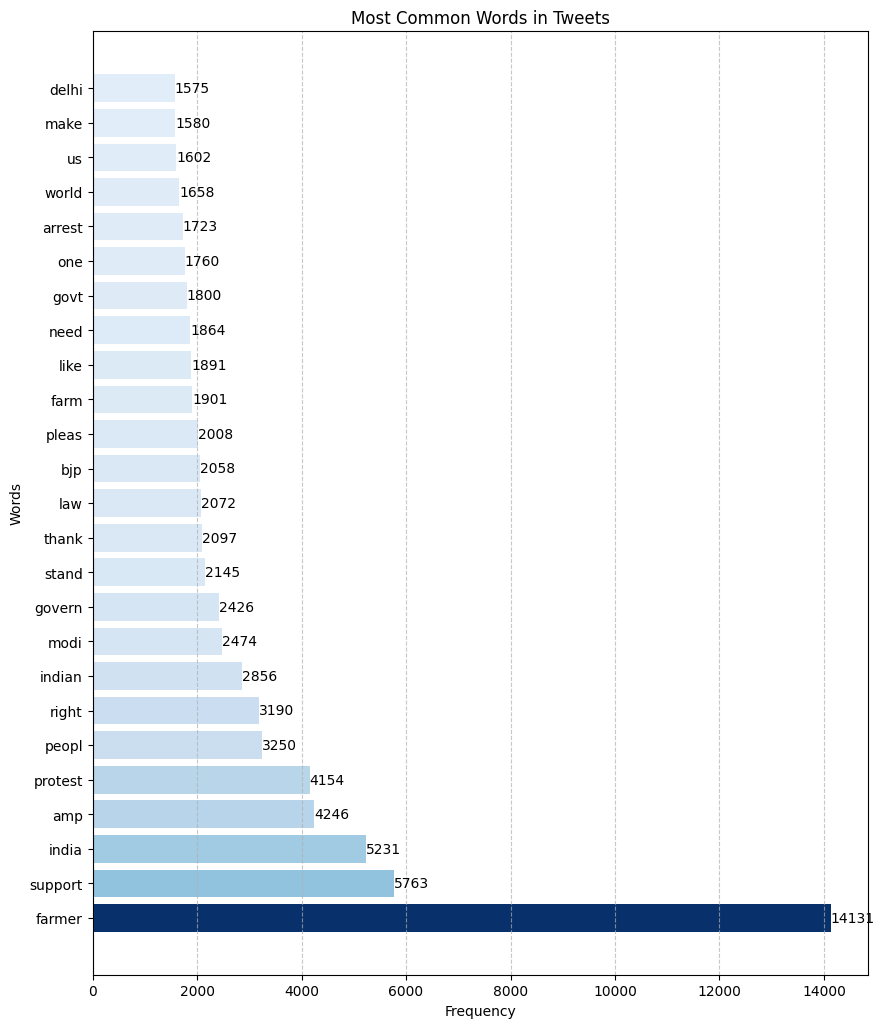

In [8]:
word_counts_noht, most_common_words_noht = word_count(token_tweets, 25, 'no_hashtags')
plot_word_counts(most_common_words_noht)

## Average Sentence Length

In [9]:
def average_sentence_length(token_tweets):
    sentence_lengths = []

    for tokenized_content in token_tweets.values():
        sentence_count = 1  # Since tokenized_content corresponds to one document (one "sentence")
        word_count = len(tokenized_content)  # Number of words in the tokenized content

        avg_length = word_count / sentence_count
        sentence_lengths.append(avg_length)

    # Compute overall average sentence length
    avg_sentence_length = mean(sentence_lengths)
    return avg_sentence_length
avg_sentence_length = average_sentence_length(token_tweets)

print(f"📊 Average Sentence Length")
print(f"-----------------------------------")
print(f"The average sentence length is {avg_sentence_length:.2f} words")


📊 Average Sentence Length
-----------------------------------
The average sentence length is 15.12 words


## Most retweeted Tweets

Top 10 most retweeted tweets: [(1360169510079111173, 7723), (1364148079117615105, 6164), (1360882069161803779, 4673), (1360908603155050498, 3742), (1360162861419425795, 3332), (1361790921902338048, 3230), (1360260269646237699, 3182), (1361897874582249474, 3057), (1363090557984141315, 3040), (1363376268784267268, 2622)]


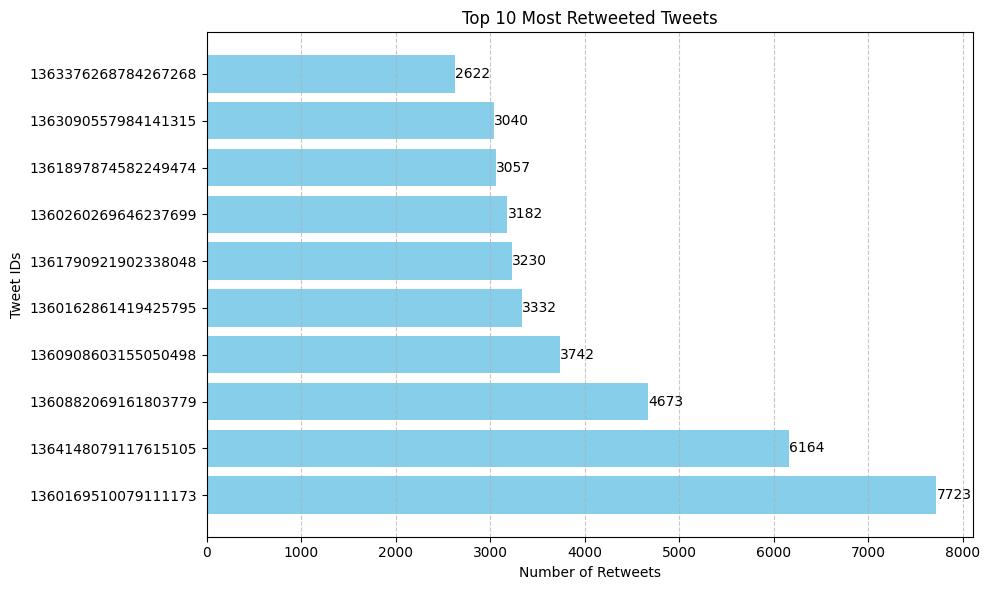

In [10]:
def rank_tweets_by_retweets(tweets):
    ranked_tweets = sorted(tweets, key=lambda tweet: tweet._retweet_count, reverse=True)
    top_retweets = [(tweet._tweet_id, tweet._retweet_count) for tweet in ranked_tweets[:10]]  # Top 10 retweeted tweets
    return top_retweets

top_retweeted_tweets = rank_tweets_by_retweets(tweets)
print("Top 10 most retweeted tweets:", top_retweeted_tweets)


def plot_top_retweeted_tweets(top_retweeted_tweets):
    
    # Check if the input list is empty
    if not top_retweeted_tweets:
        print("No tweets to display.")
        return
    
    # Unzip the tweet IDs and retweet counts
    tweet_ids, retweet_counts = zip(*top_retweeted_tweets)
    tweet_ids = list(map(str, tweet_ids))  # Convert tweet IDs to string if necessary

    # Create a horizontal bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(tweet_ids, retweet_counts, color='skyblue')

    # Add labels to the bars
    for bar, count in zip(bars, retweet_counts):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(count), 
                 va='center', ha='left', fontsize=10)

    plt.title('Top 10 Most Retweeted Tweets')
    plt.xlabel('Number of Retweets')
    plt.ylabel('Tweet IDs')
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability
    plt.tight_layout()
    plt.show()

# Example usage
plot_top_retweeted_tweets(top_retweeted_tweets)



## Word Cloud

In [11]:
def create_word_cloud(word_counts, top_words):
    
    # Get the most common words
    most_common_words = word_counts.most_common(top_words)

    # Create a WordCloud object with custom settings
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',  # Dark background for contrast
        colormap='Set2',           # Color palette for the words
        max_words=top_words,       # Maximum number of words to display
    ).generate_from_frequencies(dict(most_common_words))

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Remove axis
    plt.title('Word Cloud of Most Common Words', fontsize=18, color='black', pad=20)
    plt.show()



### Including all words

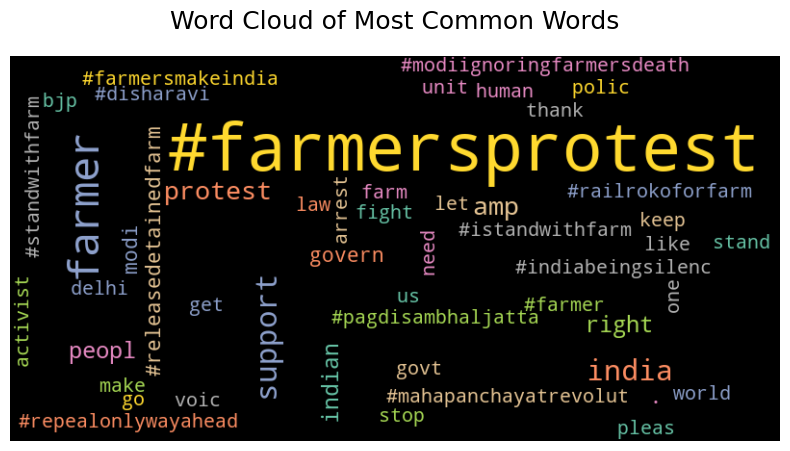

In [12]:
# Use the word counts from the earlier analysis
create_word_cloud(word_counts_all, 50)

### Only Hashtags

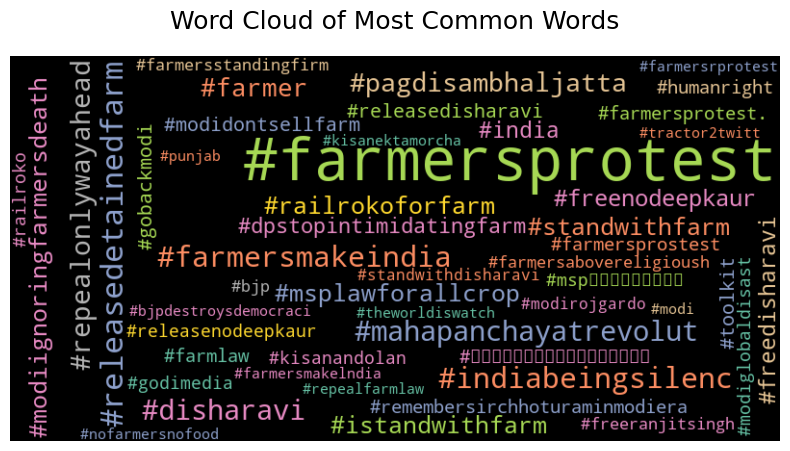

In [13]:
# Use the word counts from the earlier analysis
create_word_cloud(word_counts_ht, 50)

### No Hashtags

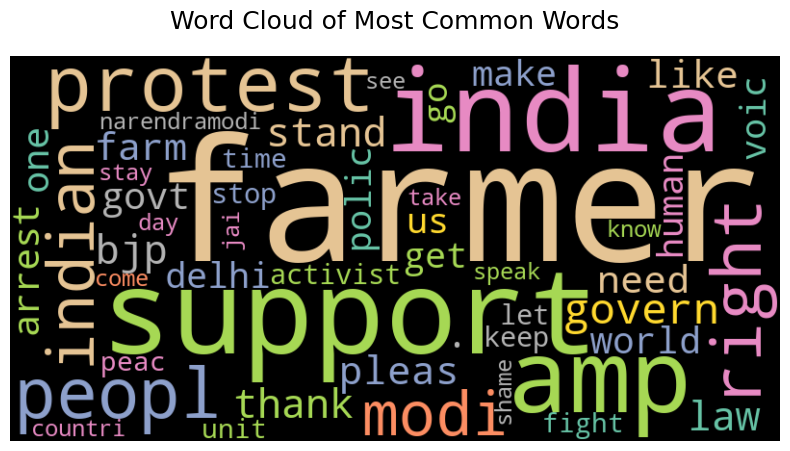

In [14]:
# Use the word counts from the earlier analysis
create_word_cloud(word_counts_noht, 50)

## Named Entities

In [15]:
def entity_recognition_nltk(token_tweets):
    entities = []
    
    for tokenized_content in token_tweets.values():
        # No need to tokenize; tokenized_content is already a list of words
        pos_tags = nltk.pos_tag(tokenized_content)  # POS tagging
        
        # Perform Named Entity Recognition (NER)
        tree = nltk.ne_chunk(pos_tags, binary=True)  # NER with binary=True (labels everything as NE or not)

        # Extract named entities
        for subtree in tree:
            if hasattr(subtree, 'label') and subtree.label() == 'NE':  # Check for named entities
                entity = " ".join([word for word, tag in subtree])  # Join words to form the entity
                entities.append(entity)
    
    return entities

named_entities = entity_recognition_nltk(token_tweets)
print("Named entities:", named_entities)


Named entities: ['mr.', 'mr.', '👌well', '▪️gobar', '𝗘𝗩𝗜𝗟', '𝗕𝗮𝗱 𝗟𝗮𝘄𝘀 𝗥𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀', '𝗘𝗩𝗜𝗟', '𝗕𝗮𝗱 𝗟𝗮𝘄𝘀 𝗥𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀', 'ਸਬਰ', '𝗧𝗵𝗲 𝗙𝗼𝘂𝗻𝗱𝗲𝗿𝘀', 'u.s.', 'u.s.', 'u.s.', '𝗕𝗝𝗣', '𝗖𝗔𝗥', 'ਵਤਨवतन', 'समझ', '#metromansreedharan', 'u.s.', 'wasn’t', '𝐏𝐡𝐨𝐭𝐨𝐬', '𝗙𝗿𝗲𝗲𝗱𝗼𝗺 𝗧𝗵𝗲 𝗪𝗼𝗹𝘃𝗲𝘀', '𝗗𝗲𝗮𝘁𝗵 𝗧𝗵𝗲 𝗦𝗵𝗲𝗲𝗽', '𝗥𝗲𝘃𝗼𝗹𝘂𝘁𝗶𝗼𝗻 𝗡𝗼', '𝗠𝗼𝘂𝗻𝘁', '𝗥𝗲𝘃𝗼𝗹𝘂𝘁𝗶𝗼𝗻 𝗡𝗼', '𝗠𝗼𝘂𝗻𝘁', 'अगर', '𝐂𝐎𝐌𝐄', '𝙏𝙝𝙤𝙙𝙞 𝘿𝙖𝙧𝙖𝙣𝙚', 'u.s.', '𝗖𝘂𝗹𝘁𝗶𝘃𝗮𝘁𝗼𝗿𝘀 𝗧𝗵𝗲 𝗘𝗮𝗿𝘁𝗵', '𝗩𝗶𝗴𝗼𝗿𝗼𝘂𝘀 𝗜𝗻𝗱𝗲𝗽𝗲𝗻𝗱𝗲𝗻𝘁 𝗩𝗶𝗿𝘁𝘂𝗼𝘂𝘀 𝗧𝗶𝗲𝗱', '𝗪𝗲𝗱𝗱𝗲𝗱', '𝗟𝗶𝗯𝗲𝗿𝘁𝘆', '𝗟𝗮𝘀𝘁𝗶𝗻𝗴', 'u.s.', 'u.s.', 'u.s.', '𝙎𝙃𝘼𝙍𝙀', '𝘼𝙉𝘿', '𝙎𝙐𝙋𝙋𝙊𝙍𝙏', 'u.s.', 'u.s.', 'u.s.', '𝙉𝙞𝙠𝙞𝙩𝙖 𝙅𝙖𝙘𝙤𝙗', '𝗪𝗶𝘁𝗵𝗵𝗼𝗹𝗱𝗶𝗻𝗴 𝗜𝗻𝗳𝗼𝗿𝗺𝗮𝘁𝗶𝗼𝗻 𝗘𝘀𝘀𝗲𝗻𝗰𝗲', 'mr.', '𝘾𝙡𝙞𝙢𝙖𝙩𝙚', '𝗗𝗲𝗮𝘁𝗵𝘀 𝗩𝗮𝗹𝗶𝗮𝗻𝘁 𝗡𝗲𝘃𝗲𝗿 𝗧𝗮𝘀𝘁𝗲 𝗗𝗲𝗮𝘁𝗵 𝗕𝘂𝘁', 'mr.', '#kanganaranaut', 'mr.', 'mr.', 'मतलब', 'ਗਲਤ', 'ਤਨ ਮਨ', '𝗦𝗼𝗺𝗲𝘁𝗶𝗺𝗲𝘀', '𝗟𝗼𝘀𝗲 𝗧𝗵𝗲𝗶𝗿 𝗥𝗶𝗴𝗵𝘁', '𝗦𝗶𝗹𝗲𝗻𝘁 𝗣𝗿𝗲𝘀𝘀𝘂𝗿𝗲𝗱 𝗧𝗼 𝗥𝗲𝗺𝗮𝗶𝗻', '“modi', 'ਅਣਖ', '𝗣𝗿𝗲𝘃𝗲𝗻𝘁 𝗜𝗻𝗷𝘂𝘀𝘁𝗶𝗰𝗲', '𝗧𝗶𝗺𝗲 𝗪𝗲 𝗙𝗮𝗶𝗹 𝗧𝗼', '𝙎𝙃𝘼𝙈𝙀']


In [16]:
def display_entities(entities):
    # Count the unique named entities
    unique_entities = set(entities)
    entity_count = len(unique_entities)
    
    # Print the count of unique named entities
    print(f"Total unique named entities found: {entity_count}\n")
    
    # Print each unique entity
    print("Unique Named Entities:")
    for entity in unique_entities:
        print(f"- {entity}")

display_entities(named_entities)

Total unique named entities found: 46

Unique Named Entities:
- 𝗟𝗮𝘀𝘁𝗶𝗻𝗴
- 𝐂𝐎𝐌𝐄
- 𝗣𝗿𝗲𝘃𝗲𝗻𝘁 𝗜𝗻𝗷𝘂𝘀𝘁𝗶𝗰𝗲
- u.s.
- 𝗟𝗼𝘀𝗲 𝗧𝗵𝗲𝗶𝗿 𝗥𝗶𝗴𝗵𝘁
- 𝙏𝙝𝙤𝙙𝙞 𝘿𝙖𝙧𝙖𝙣𝙚
- 𝗖𝘂𝗹𝘁𝗶𝘃𝗮𝘁𝗼𝗿𝘀 𝗧𝗵𝗲 𝗘𝗮𝗿𝘁𝗵
- 𝗗𝗲𝗮𝘁𝗵 𝗧𝗵𝗲 𝗦𝗵𝗲𝗲𝗽
- समझ
- ਸਬਰ
- 𝐏𝐡𝐨𝐭𝐨𝐬
- wasn’t
- 𝗗𝗲𝗮𝘁𝗵𝘀 𝗩𝗮𝗹𝗶𝗮𝗻𝘁 𝗡𝗲𝘃𝗲𝗿 𝗧𝗮𝘀𝘁𝗲 𝗗𝗲𝗮𝘁𝗵 𝗕𝘂𝘁
- 𝗟𝗶𝗯𝗲𝗿𝘁𝘆
- 𝗕𝗝𝗣
- ਵਤਨवतन
- 𝙉𝙞𝙠𝙞𝙩𝙖 𝙅𝙖𝙘𝙤𝙗
- मतलब
- 𝙎𝙃𝘼𝙍𝙀
- 𝗦𝗼𝗺𝗲𝘁𝗶𝗺𝗲𝘀
- ਗਲਤ
- 𝗘𝗩𝗜𝗟
- #kanganaranaut
- अगर
- 𝗪𝗶𝘁𝗵𝗵𝗼𝗹𝗱𝗶𝗻𝗴 𝗜𝗻𝗳𝗼𝗿𝗺𝗮𝘁𝗶𝗼𝗻 𝗘𝘀𝘀𝗲𝗻𝗰𝗲
- 𝗦𝗶𝗹𝗲𝗻𝘁 𝗣𝗿𝗲𝘀𝘀𝘂𝗿𝗲𝗱 𝗧𝗼 𝗥𝗲𝗺𝗮𝗶𝗻
- ਅਣਖ
- 𝘾𝙡𝙞𝙢𝙖𝙩𝙚
- ਤਨ ਮਨ
- 𝗙𝗿𝗲𝗲𝗱𝗼𝗺 𝗧𝗵𝗲 𝗪𝗼𝗹𝘃𝗲𝘀
- #metromansreedharan
- 𝗠𝗼𝘂𝗻𝘁
- 𝗕𝗮𝗱 𝗟𝗮𝘄𝘀 𝗥𝗶𝗴𝗵𝘁𝗲𝗼𝘂𝘀
- 𝗥𝗲𝘃𝗼𝗹𝘂𝘁𝗶𝗼𝗻 𝗡𝗼
- 𝙎𝙐𝙋𝙋𝙊𝙍𝙏
- 👌well
- “modi
- 𝗧𝗶𝗺𝗲 𝗪𝗲 𝗙𝗮𝗶𝗹 𝗧𝗼
- 𝗪𝗲𝗱𝗱𝗲𝗱
- mr.
- 𝘼𝙉𝘿
- 𝙎𝙃𝘼𝙈𝙀
- ▪️gobar
- 𝗩𝗶𝗴𝗼𝗿𝗼𝘂𝘀 𝗜𝗻𝗱𝗲𝗽𝗲𝗻𝗱𝗲𝗻𝘁 𝗩𝗶𝗿𝘁𝘂𝗼𝘂𝘀 𝗧𝗶𝗲𝗱
- 𝗧𝗵𝗲 𝗙𝗼𝘂𝗻𝗱𝗲𝗿𝘀
- 𝗖𝗔𝗥


## Sentiment Analysis

We've decided to also do a sentiment analysis study that can be really usefull to understand the data.

In [22]:
def calculate_sentiment_scores(token_tweets):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = {}

    # Iterate over the dictionary with tokenized tweets
    for tweet_id, token_list in token_tweets.items():
        # Join the token list back into a single string
        tweet_text = ' '.join(token_list)
        sentiment = analyzer.polarity_scores(tweet_text)  # Get sentiment scores
        sentiment_scores[tweet_id] = sentiment['compound']  # Use compound score

    return sentiment_scores

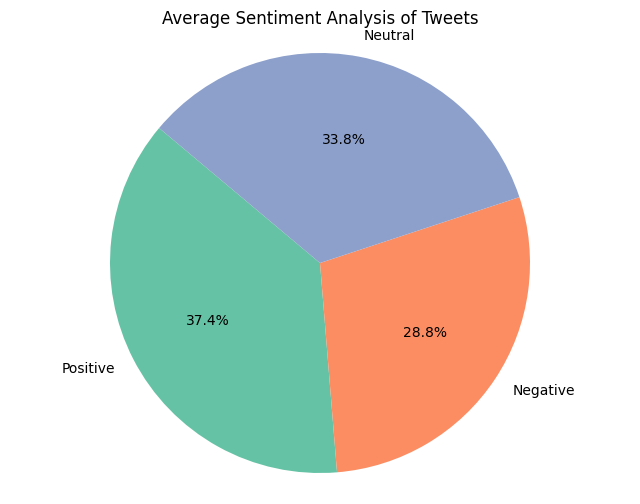

In [25]:

def plot_sentiment_pie(sentiment_scores):
    
    # Categorize each tweet's sentiment
    sentiment_categories = {'Positive': 0, 'Negative': 0, 'Neutral': 0}
    
    for score in sentiment_scores.values():
        if score > 0.029:
            sentiment_categories['Positive'] += 1
        elif score < -0.1:
            sentiment_categories['Negative'] += 1
        else:
            sentiment_categories['Neutral'] += 1

    # Prepare data for pie chart
    labels = list(sentiment_categories.keys())
    sizes = list(sentiment_categories.values())
    
    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
    plt.title('Average Sentiment Analysis of Tweets')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

sentiment_scores = calculate_sentiment_scores(token_tweets)
plot_sentiment_pie(sentiment_scores)